## Credit Card Customer Segmentation

#### Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.


Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers? 

Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
print(data.info())
print()
print(data.shape)
print()
print(data.describe())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB
None

(660, 7)

            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000     

In [5]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [6]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
data.rename(columns={'Customer Key': 'Customer_Key'},inplace=True)

In [8]:
data['Customer_Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer_Key, Length: 655, dtype: int64

In [9]:
duplicateRowsDF = data[data.duplicated(['Customer_Key'],keep=False)]
duplicateRowsDF

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


Comments:

Customer_Key is unique number for each customer. Although from the data it shows that there are 5 customers has the same customer key, upon investigation as above, we can see that those are not duplicated rows as suspected.

It might be typo error for the customer key, will not drop the rows with same customer key.

However, we will drop customer_Key column for further analysis.

Series number is a sequential number for the data. Will drop this column for further analysis.

In [10]:
#Drop columns 'Sl_No' & 'Customer_Key'
data.drop(['Sl_No','Customer_Key'],axis=1,inplace=True)

In [11]:
import pandas_profiling

In [12]:
# using pandas_profiling to have a quick general view of the data
from pandas_profiling import ProfileReport
prof = ProfileReport(data) 
prof.to_file(output_file='Project 5: AllLife Credit Card Customer Segmentation - Pandas Profiling.html')

In [13]:
pandas_profiling.ProfileReport(data)

As per pandaprofiling report :
    
* Dataset has 11 (1.7%) duplicate rows
* Zero missing cells values
* Total_calls_made has 97 (14.7%) zeros
* Total_visits_bank has 100 (15.2%) zeros
* Total_visits_online has 144 (21.8%) zeros

In [14]:
# drop duplicated rows
data.drop_duplicates(inplace=True)

In [15]:
data = data.reset_index(drop=True)

In [16]:
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
644,99000,10,1,10,0
645,84000,10,1,13,2
646,145000,8,1,9,1
647,172000,10,1,15,0


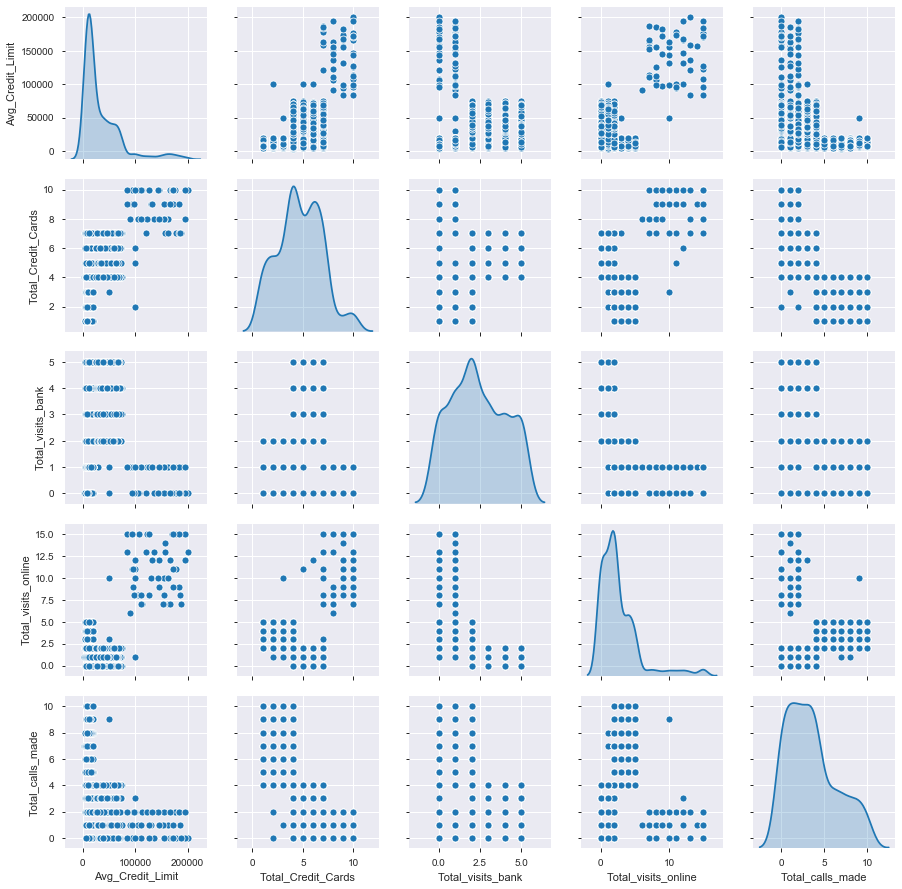

In [17]:
sns.pairplot(data,diag_kind='kde');

In [18]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.612623,-0.099157,0.552941,-0.418351
Total_Credit_Cards,0.612623,1.000000,0.311524,0.169961,-0.653325
Total_visits_bank,-0.099157,0.311524,1.000000,-0.554078,-0.504256
Total_visits_online,0.552941,0.169961,-0.554078,1.000000,0.125480
Total_calls_made,-0.418351,-0.653325,-0.504256,0.125480,1.000000


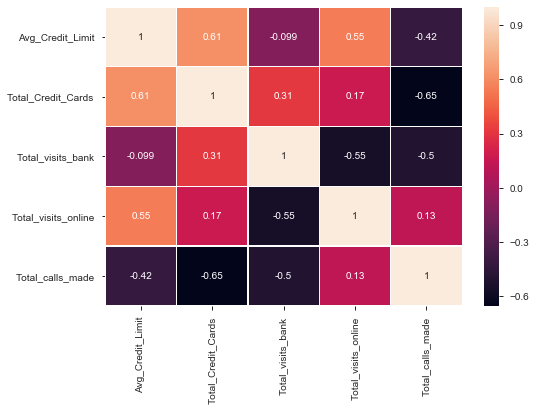

In [19]:
sns.heatmap(data.corr(),annot=True,linewidths=0.3);

Comments:
* Total credit cards and total visit online has medium positive correlation with average credit limit : 0.61,0.55 respectively.
* Total credit cards and total visit bank has medium negative correlation with total calls made : -0.65,-0.5 respectively.
* Total visit online and medium negative correlation with total visit bank : -0.55.


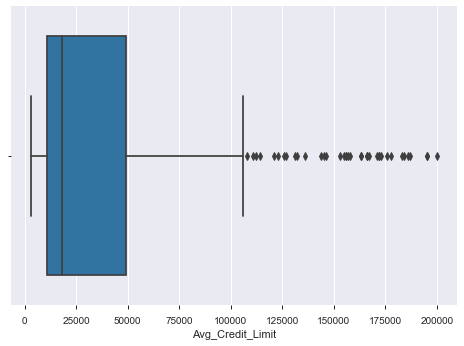

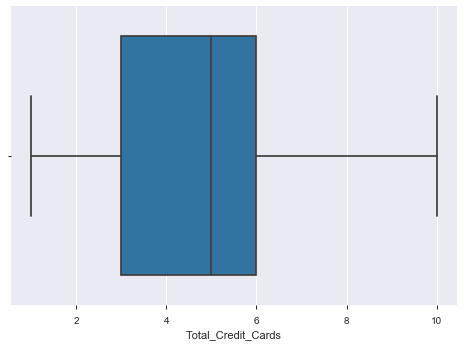

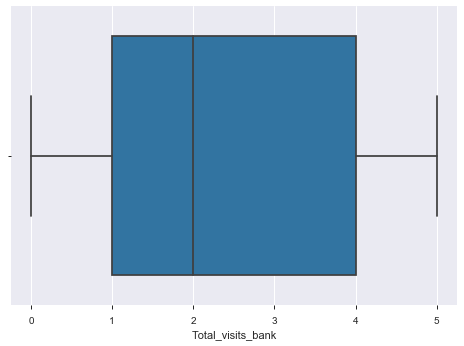

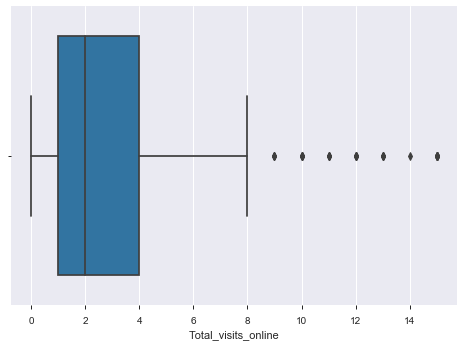

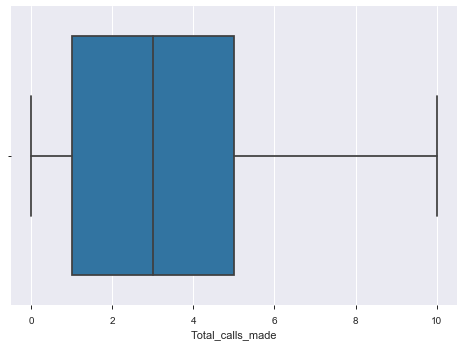

In [20]:
for column in data.columns:
    sns.boxplot(data[column])
    plt.show()

Comment:
* Avg_Credit_Limit & Total_visits_online have outliers.However this doesn't mean that we have to deal with these outliers, it could be just the fact that customer has more credit limit and more visits online than others.

 

4     0.226502
6     0.174114
7     0.154083
5     0.114022
2     0.097072
1     0.089368
3     0.081664
10    0.029276
9     0.016949
8     0.016949
Name: Total_Credit_Cards, dtype: float64


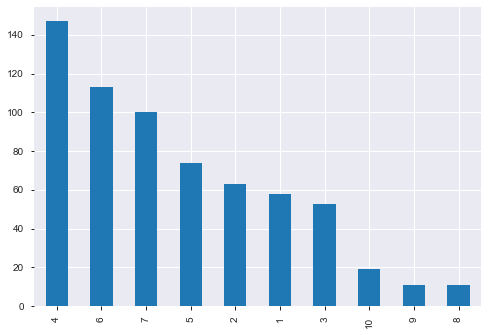

In [21]:
data['Total_Credit_Cards'].value_counts().plot(kind='bar');
print(data['Total_Credit_Cards'].value_counts(normalize=True))

In [22]:
data.loc[data['Total_Credit_Cards']>=4].shape[0] / data.shape[0]

0.7318952234206472

comment:
* about 73% of the customers has at least 4 credit cards or more.

2    0.240370
1    0.172573
3    0.152542
0    0.149461
5    0.146379
4    0.138675
Name: Total_visits_bank, dtype: float64


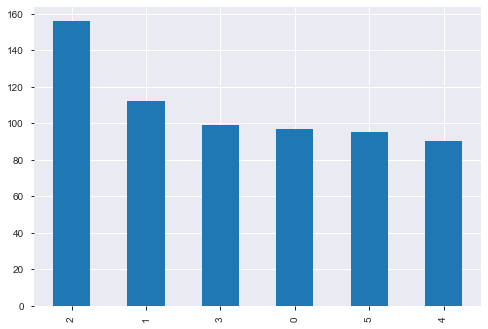

In [23]:
data['Total_visits_bank'].value_counts().plot(kind='bar');
print(data['Total_visits_bank'].value_counts(normalize=True))

Comments:
* 15% of the customer do not visit bank.
* 17% of the customer visited bank 1 times.
* 24% of the customer visited bank 2 times.
* pretty even distribution for customer visit bank for 3,4,5 times 14%-15% 

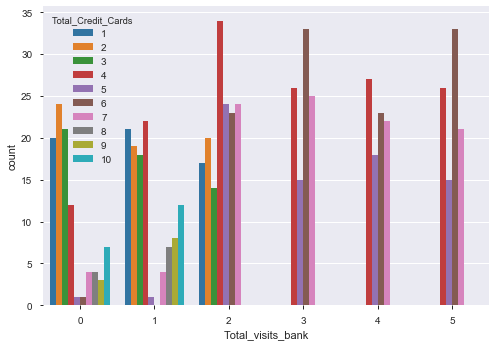

In [24]:
sns.countplot(x='Total_visits_bank',hue='Total_Credit_Cards',data=data);

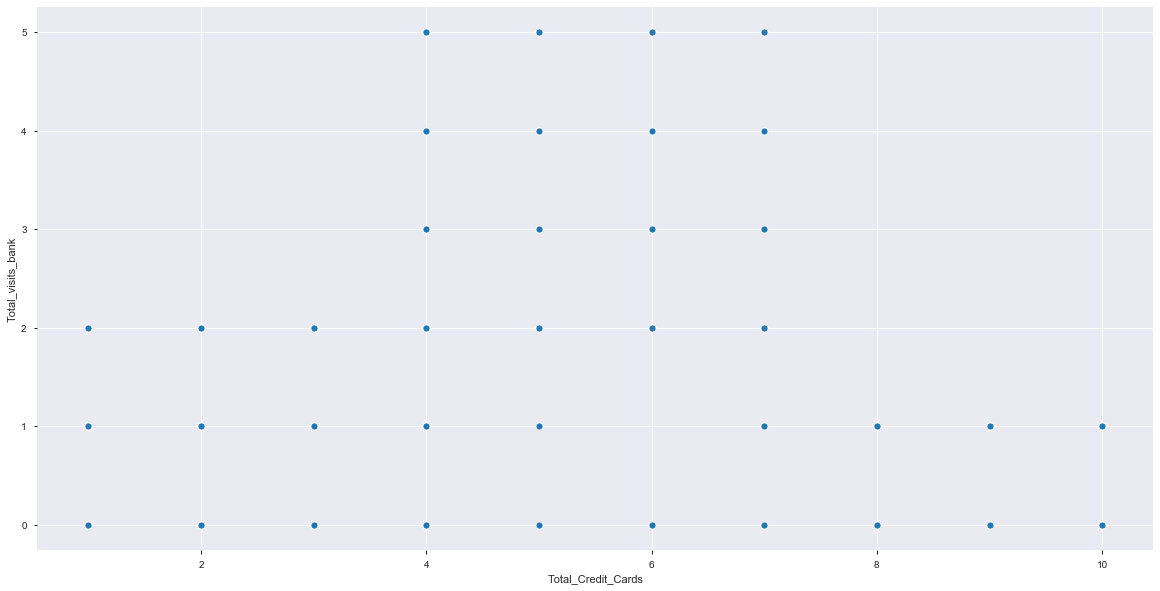

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Total_Credit_Cards',y='Total_visits_bank', data=data);

Comments:
* customers who have less than 4 credit cards visited bank less - 2 times or less.
* customers who have more than 7 credit cards visited bank less - 1 time or less.
* customers who have 4 to 7 credit cards visits banks more than others - up to 5 times.

2     0.285054
0     0.217257
1     0.164869
4     0.104777
5     0.083205
3     0.066256
15    0.015408
7     0.010786
12    0.009245
10    0.009245
8     0.009245
13    0.007704
11    0.007704
9     0.006163
14    0.001541
6     0.001541
Name: Total_visits_online, dtype: float64


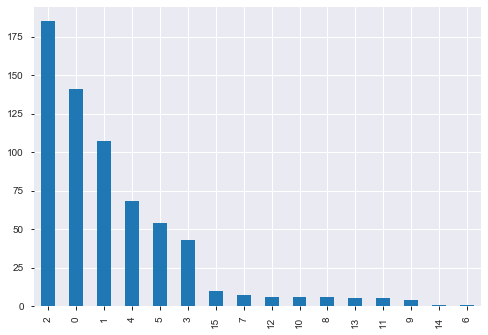

In [26]:
data['Total_visits_online'].value_counts().plot(kind='bar');
print(data['Total_visits_online'].value_counts(normalize=True))

In [27]:
data.loc[data['Total_visits_online']==0].shape[0] / data.shape[0]

0.2172573189522342

In [28]:
data.loc[(data['Total_visits_online']>=1)&(data['Total_visits_online']<=5)].shape[0] / data.shape[0]

0.7041602465331279

In [29]:
data.loc[data['Total_visits_online']>=6].shape[0] / data.shape[0]

0.07858243451463791

Comments:
* 22% of the customer never visit online
* 70% of the customer visit online between 1-5times.
* only small percentage of the customer visit online more than 6 times (8%)

4     0.160247
0     0.147920
2     0.138675
1     0.135593
3     0.126348
6     0.060092
7     0.052388
9     0.049307
8     0.046225
5     0.043143
10    0.040062
Name: Total_calls_made, dtype: float64


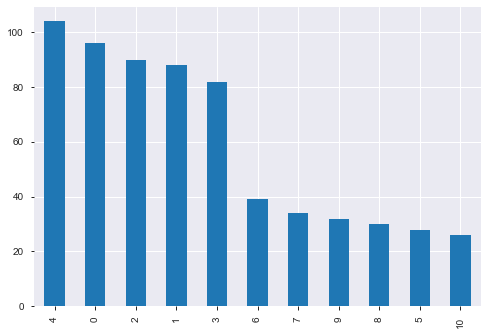

In [30]:
data['Total_calls_made'].value_counts().plot(kind='bar');
print(data['Total_calls_made'].value_counts(normalize=True))

In [31]:
data.loc[data['Total_calls_made']==0].shape[0] / data.shape[0]

0.14791987673343607

In [32]:
data.loc[(data['Total_calls_made']>=1) & (data['Total_calls_made']<=4)].shape[0] / data.shape[0]

0.5608628659476117

In [33]:
data.loc[data['Total_calls_made']>=5].shape[0] / data.shape[0]

0.29121725731895226

Comments:
    
* 15% of the customer never make any calls to the bank.
* 56% of the customer make calls between 1-4 times.
* 29% of the customer make calls more than 5 times.

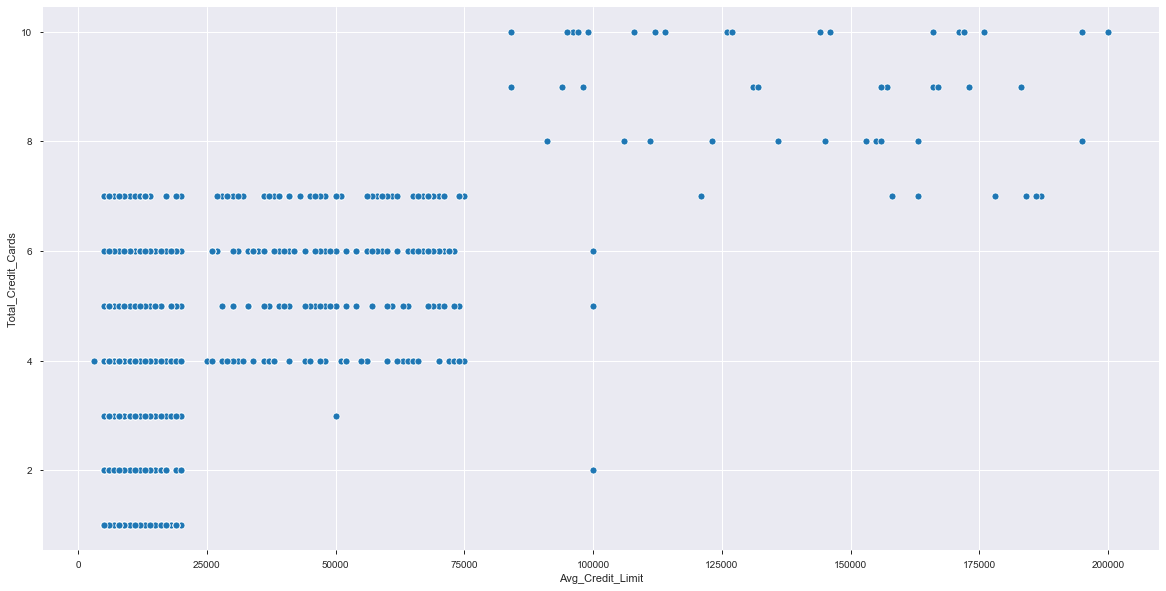

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards', data=data); 

In [35]:
filt = (data['Avg_Credit_Limit']>25000) & (data['Total_Credit_Cards'] < 4)
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9


In [36]:
filt = (data['Avg_Credit_Limit']>75000) & (data['Total_Credit_Cards'] < 7)
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
4,100000,6,0,12,3
6,100000,5,0,11,2


comment:
* customer has average credit limit more than 75,000 has 7-10 credit cards.
* customer has average credit limit between 25,000 and 75,000 has 4-7 credit cards.
* customer has average credit limit less than 25,000 has at least 1 credit card to maximum 7 credit cards.
* rows 0,1,4,6 are the outliers in this analysis, consider drop these rows

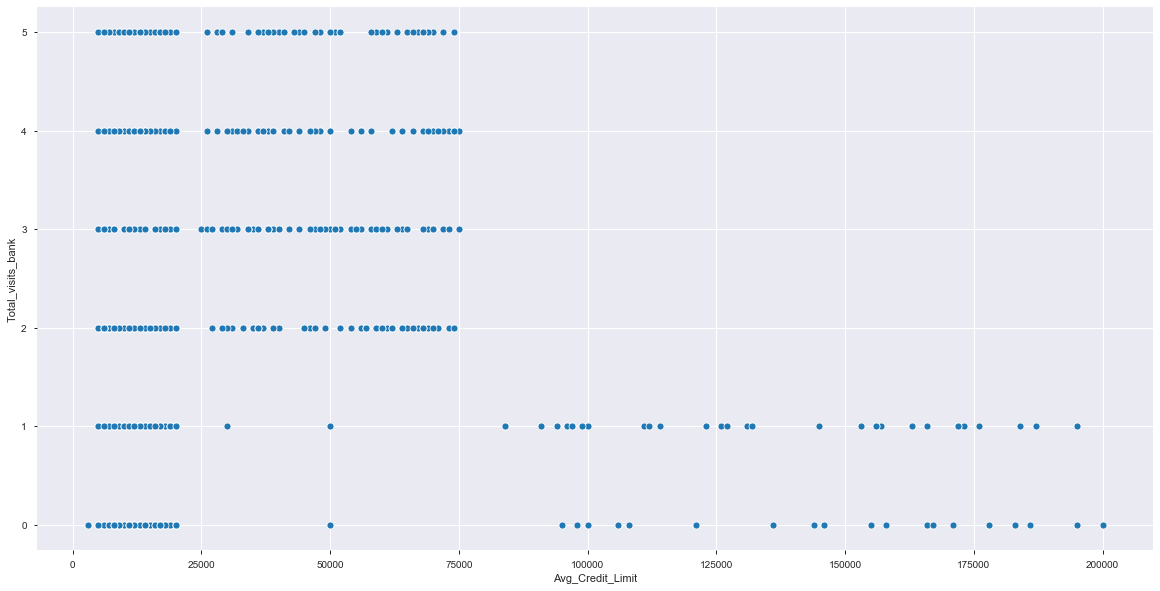

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_visits_bank', data=data); 

In [38]:
filt = (data['Avg_Credit_Limit']>25000) & (data['Avg_Credit_Limit']<75000) & (data['Total_visits_bank'] < 2) 
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4


Comments:
* customer has average credit limit more than 75,000 has fewer bank visits. (0-1 visit)
* customer has average credit limit between 25,000 and 75,000 has 2-5 bank visits.
* customer has average credit limit less than 25,000 visited banks more than others.
* rows 1,2,3 are the outliers in this analysis, consider drop these rows

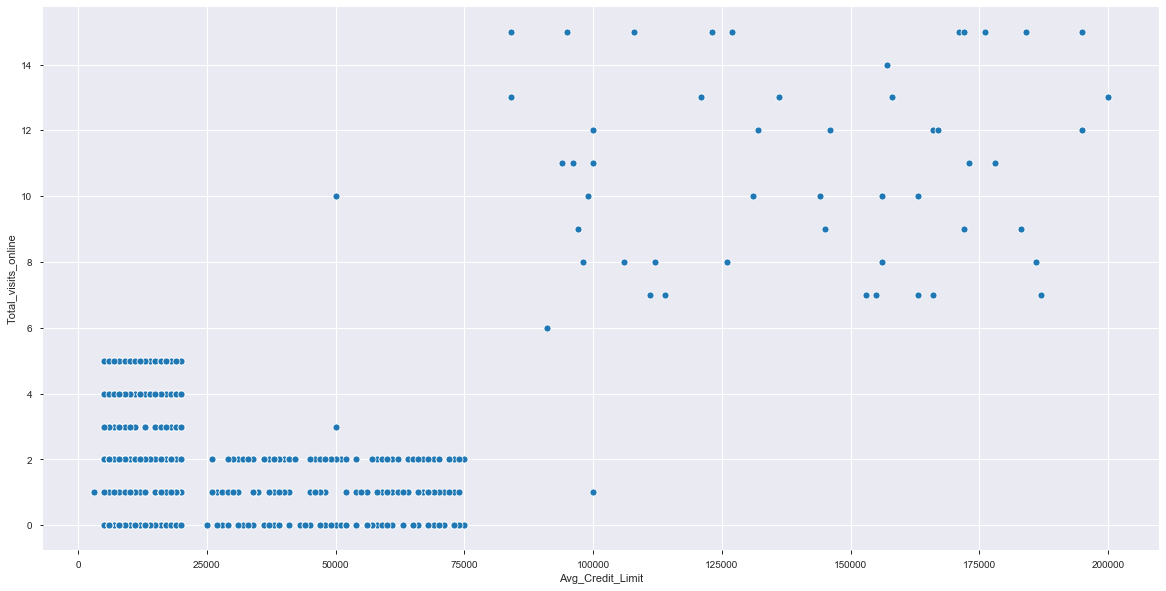

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_visits_online', data=data); 

In [40]:
filt = (data['Avg_Credit_Limit']>75000) & (data['Total_visits_online'] < 7) 
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
614,91000,8,1,6,1


In [41]:
filt = (data['Avg_Credit_Limit']>25000) & (data['Avg_Credit_Limit']<75000) & (data['Total_visits_online'] >2) 
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
2,50000,7,1,3,4


Comments:
* customers have average credit limit more than 75,000 has higher online visits. (6-14 visits)
* customers have average credit limit between 25,000 and 75,000 has 2 or less online visits.
* customers have average credit limit less than 25,000 has less online visit. (0 to 5 online visits)
* rows 0,1,2,614 are the outliers in this analysis, consider drop these rows

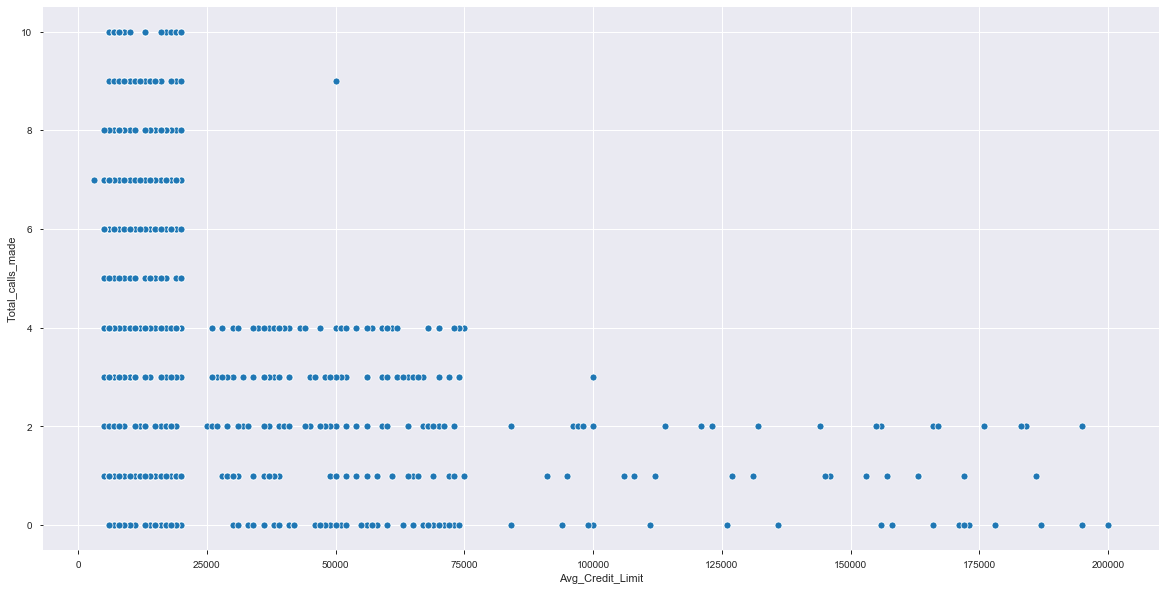

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Avg_Credit_Limit',y='Total_calls_made', data=data); 

In [43]:
filt = (data['Avg_Credit_Limit']>75000) & (data['Total_calls_made'] > 2) 
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,100000,6,0,12,3


In [44]:
filt = (data['Avg_Credit_Limit']>25000) & (data['Total_calls_made'] > 4) 
data.loc[(filt)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9


Comments:
* customers have average credit limit more than 75,000 has less total calls made. (0-2 calls)
* customers have average credit limit between 25,000 and 75,000 has 0-4 total calls made.
* customers have average credit limit less than 25,000 has more total calls made. (0 to 10 total calls made)
* rows 1,4 are the outliers in this analysis, consider drop these rows

In [45]:
# drop rows 0,1,2,3,4,6,614
data.drop(data.index[[0,1,2,3,4,6,614]],inplace=True)

In [46]:
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
5,20000,3,0,1,8
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7
10,10000,4,0,5,5
...,...,...,...,...,...
644,99000,10,1,10,0
645,84000,10,1,13,2
646,145000,8,1,9,1
647,172000,10,1,15,0


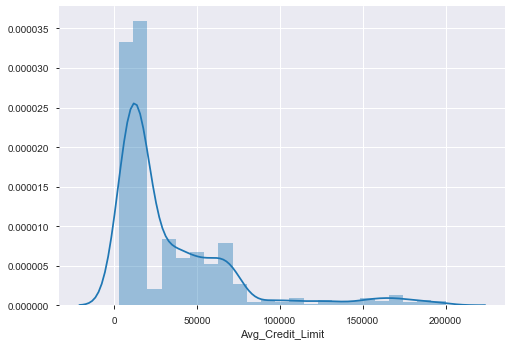

In [47]:
sns.distplot(data['Avg_Credit_Limit']);

In [48]:
data['Avg_Credit_Limit'].describe()

count       642.000000
mean      34447.040498
std       37680.169358
min        3000.000000
25%       11000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

In [49]:
data['Avg_Credit_Limit'].value_counts()

8000      32
6000      30
13000     28
9000      27
19000     26
          ..
25000      1
153000     1
111000     1
112000     1
173000     1
Name: Avg_Credit_Limit, Length: 108, dtype: int64

In [50]:
# low average credit limit ( <25,000)
data.loc[data['Avg_Credit_Limit']<25000].shape[0] / data.shape[0]

0.5934579439252337

In [51]:
# medium average credit limit ( between 25,000 & 74,999)
data.loc[(data['Avg_Credit_Limit']>=25000) & (data['Avg_Credit_Limit']<75000)].shape[0] / data.shape[0]

0.3302180685358255

In [52]:
#high average credit limit ( >=75,000)
data.loc[data['Avg_Credit_Limit']>=75000].shape[0] / data.shape[0]

0.0763239875389408

Comment:
* average credit limit is right skewed.
* 59.3% customer with low average credit limit ( <25,000)
* 33 % customer with medium average credit limit ( between 25,000 & 74,999)
* 7.6% customer with high average credit limit ( >=75,000)

In [53]:
data = data.reset_index(drop=True)

In [54]:
# Scaling the features by zscore
from scipy.stats import zscore
data_z = data.apply(zscore)
data_z = pd.DataFrame(data_z,columns=data.columns)

In [55]:
data_z.shape

(642, 5)

In [56]:
data_z

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.383711,-0.783896,-1.491693,-0.545200,1.531504
1,-0.516511,-0.783896,-1.491693,-0.545200,-0.901362
2,-0.782109,-1.243916,-1.491693,-0.201032,-0.553810
3,-0.835229,-0.323877,-1.491693,-0.545200,1.183952
4,-0.649310,-0.323877,-1.491693,0.831470,0.488847
...,...,...,...,...,...
637,1.714517,2.436240,-0.874639,2.552306,-1.248915
638,1.316119,2.436240,-0.874639,3.584808,-0.553810
639,2.936270,1.516201,-0.874639,2.208139,-0.901362
640,3.653386,2.436240,-0.874639,4.273142,-1.248915


### K-means Clustering

In [57]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score

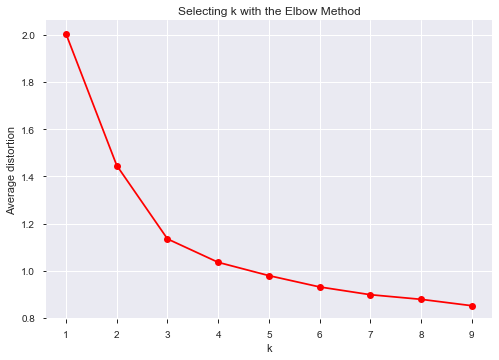

In [58]:
clusters = range(1,10)

meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(data_z)
    predict=km.predict(data_z)
    meanDistortions.append(sum(np.min(cdist(data_z,km.cluster_centers_, 'euclidean'), axis=1)) / 
                           data_z.shape[0])

plt.plot(clusters, meanDistortions, 'ro-')

plt.title('Selecting k with the Elbow Method')

plt.xlabel('k');

plt.ylabel('Average distortion');

In [59]:
# set k=3 
km = KMeans(n_clusters=3, n_init = 15, random_state=38)

In [60]:
km.fit(data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=38, tol=0.0001, verbose=0)

In [61]:
predict = km.fit_predict(data_z)

In [62]:
km_silhouette_score = silhouette_score(data_z, predict)

In [63]:
km_silhouette_score

0.5207269512698913

In [64]:
centroids = km.cluster_centers_

In [65]:
centroids

array([[-0.01548547,  0.37780641,  0.67046205, -0.55345955, -0.55844414],
       [-0.59437918, -1.05572582, -0.90549208,  0.32616939,  1.14287744],
       [ 2.90575468,  1.92728253, -1.1109577 ,  2.88915036, -0.89396776]])

In [66]:
centroid_df = pd.DataFrame(centroids, columns = list(data_z) )

In [67]:
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.015485,0.377806,0.670462,-0.553460,-0.558444
1,-0.594379,-1.055726,-0.905492,0.326169,1.142877
2,2.905755,1.927283,-1.110958,2.889150,-0.893968


Comment:
* Cluster 2 has the highest value for Avg_Credit_Limit,Total_Credit_Cards & Total_visits_online.
* Cluster 2 has the lowest value for Total_visits_bank.
* Cluster 1 has the highest value for Total_calls_made.
* Cluster 1 has the lowest value for Avg_Credit_Limit & Total_Credit_Cards.
* Cluster 0 has the highest value for Total_visits_bank.
* Cluster 0 has the lowest value for Total_visits_online.
* K-means silhouette_score is 0.52072.

In [68]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
data_group = data.copy()

In [70]:
data_group['Group'] = predict 
data_z['Group'] = predict

In [71]:
data_group['Group'] = data_group['Group'].astype('category')
data_z['Group'] = data_z['Group'].astype('category')

In [72]:
data_group['Group'].value_counts(normalize=True)  

0    0.584112
1    0.342679
2    0.073209
Name: Group, dtype: float64

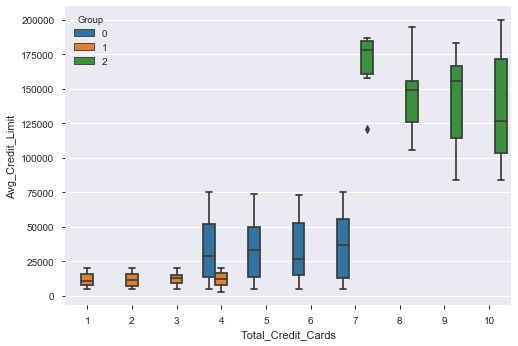

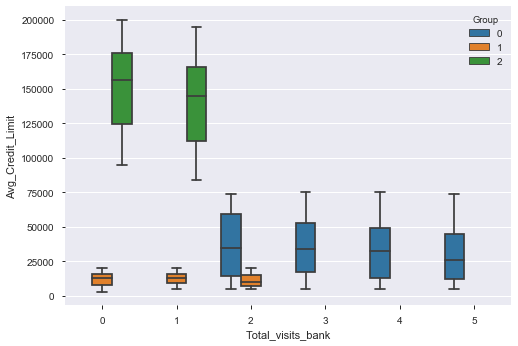

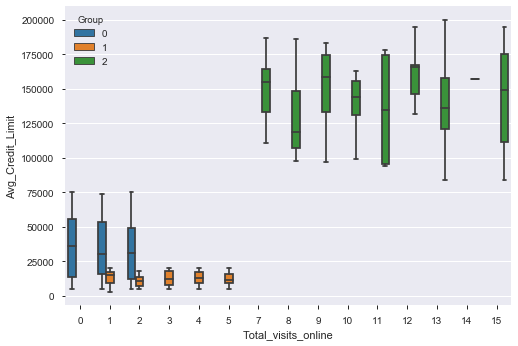

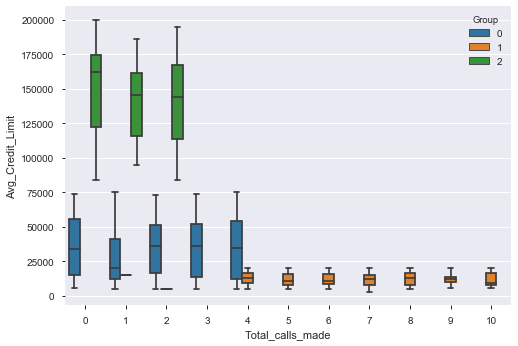

In [73]:
for i in data_group.columns[(data_group.columns!='Group') & (data_group.columns!='Avg_Credit_Limit')]:
    
    sns.boxplot(x=data_group[i],y=data_group['Avg_Credit_Limit'], hue=data_group['Group'])

    plt.show()

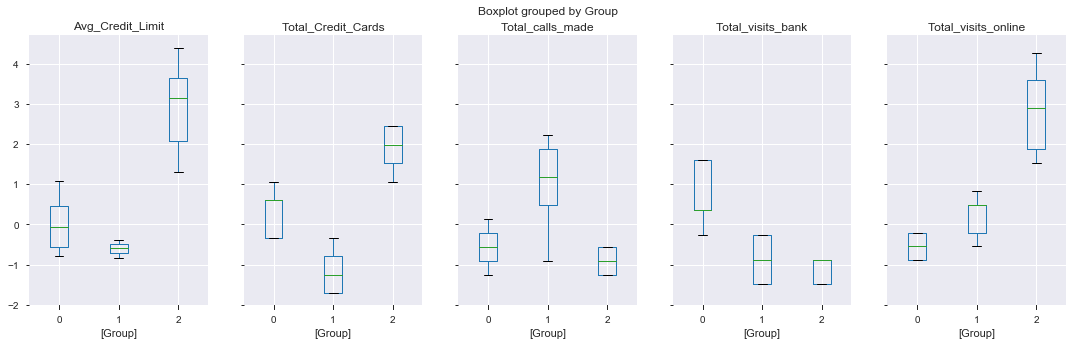

In [74]:
data_z.boxplot(by='Group',layout=(1,5),figsize=(18,5));

Comments:
* Group 2 has an obvious distinction compare to group 0 and 1.
    * Customers who have average credit limit of 75k and above are in group 2.
    * Customers who have more than 7 credit cards are in group 2.
    * Customers who have visited online more than 6 times are in group 2.
* Group 1 has less credit cards compare to other groups - 1-4 credit cards.
* Group 1 has one attribute that is distinct from other group namely, customers who make calls more than 4 times.
* Group 0 visited bank more than other groups - more than 2 times and up to 5 times.
* Group 0 also less visited bank online compare to other groups.

### Hierarchical clustering

In [75]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_std = pd.DataFrame(scalar.fit_transform(data),columns=data.columns)
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.383711,-0.783896,-1.491693,-0.545200,1.531504
1,-0.516511,-0.783896,-1.491693,-0.545200,-0.901362
2,-0.782109,-1.243916,-1.491693,-0.201032,-0.553810
3,-0.835229,-0.323877,-1.491693,-0.545200,1.183952
4,-0.649310,-0.323877,-1.491693,0.831470,0.488847


### linkage method ='ward'

In [77]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [78]:
Z = linkage(X_std, metric='euclidean', method='ward')
ward_c, coph_dists = cophenet(Z , pdist(X_std))

In [79]:
#Store for final comparison

results = pd.DataFrame({'linkage':['ward'], 'cophenetic coeff': ward_c},index={'0'})
results = results[['linkage', 'cophenetic coeff']]
results

,linkage,cophenetic coeff
0,ward,0.742861


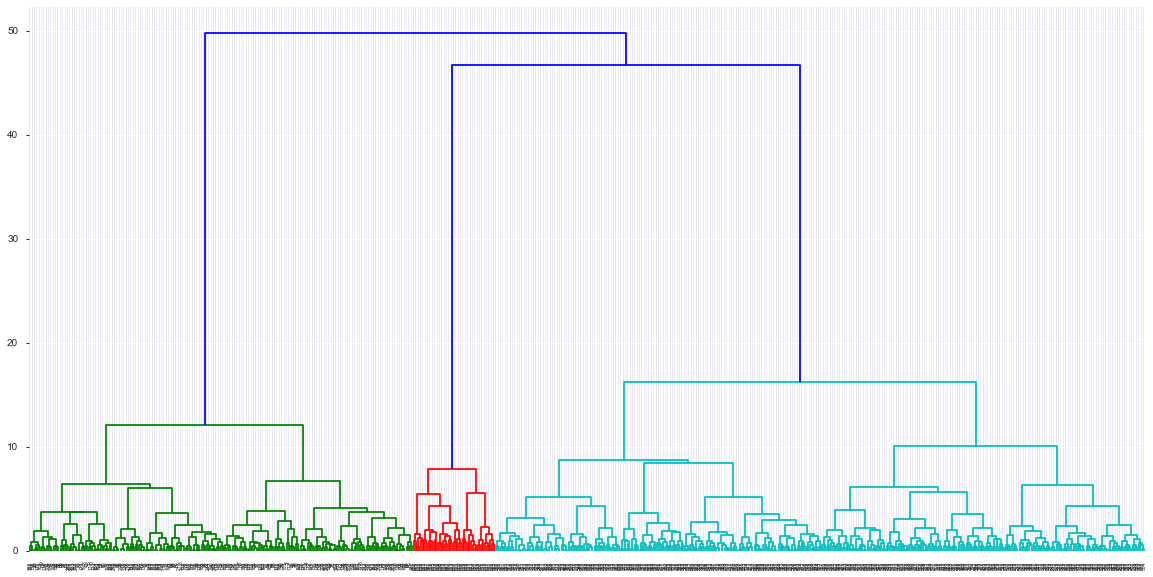

In [80]:
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

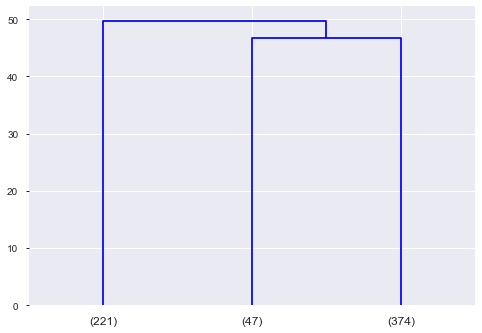

In [81]:
dendrogram(Z, truncate_mode='lastp',p=3)
plt.show()

In [82]:
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
ward_sc = silhouette_score(X_std,clusters)

In [83]:
#Store  for final comparison

results1 = pd.DataFrame({'linkage':['ward'], 'silhouette_score': ward_sc},index={'0'})
results1 = results1[['linkage', 'silhouette_score']]
results = pd.merge(results,results1, on='linkage')
results

,linkage,cophenetic coeff,silhouette_score
0,ward,0.742861,0.519784


### linkage method ='average'

In [84]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [85]:
Z = linkage(X_std, metric='euclidean', method='average')
average_c, coph_dists = cophenet(Z , pdist(X_std))

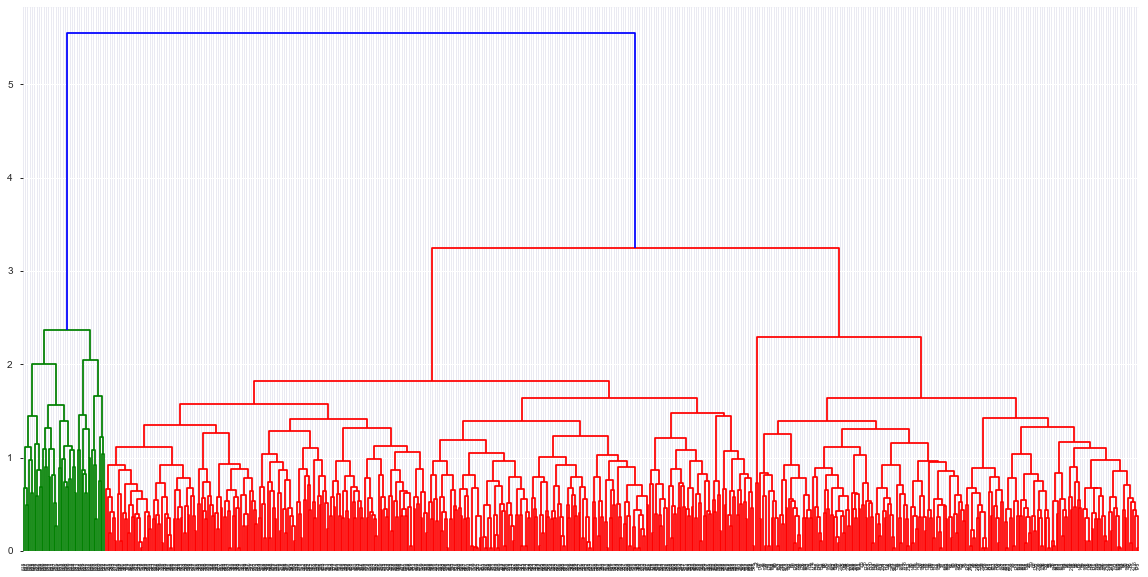

In [86]:
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

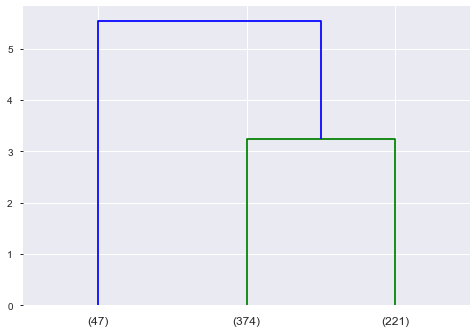

In [87]:
dendrogram(Z, truncate_mode='lastp',p=3)
plt.show()

In [88]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
average_sc = silhouette_score(X_std,clusters)

In [89]:
tempResultsDf = pd.DataFrame({'linkage':['average'], 
                              'cophenetic coeff': average_c,
                              'silhouette_score': average_sc},index={'1'})
results = pd.concat([results, tempResultsDf])
results = results[['linkage','cophenetic coeff', 'silhouette_score']]
results

,linkage,cophenetic coeff,silhouette_score
0,ward,0.742861,0.519784
1,average,0.902956,0.519784


### linkage method ='complete'

In [90]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [91]:
Z = linkage(X_std, metric='euclidean', method='complete')
complete_c, coph_dists = cophenet(Z , pdist(X_std))

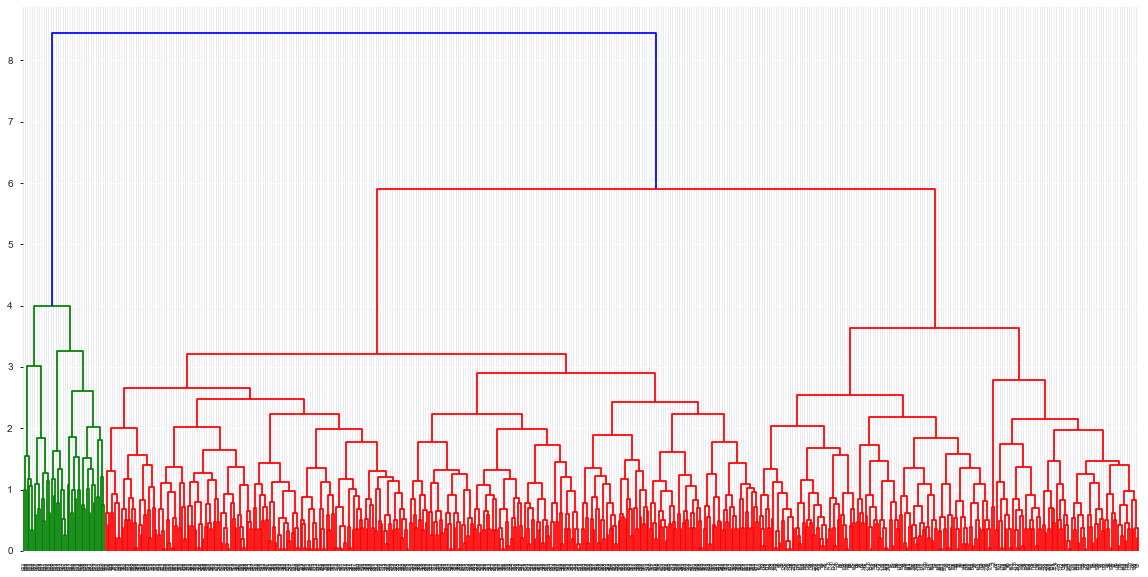

In [92]:
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

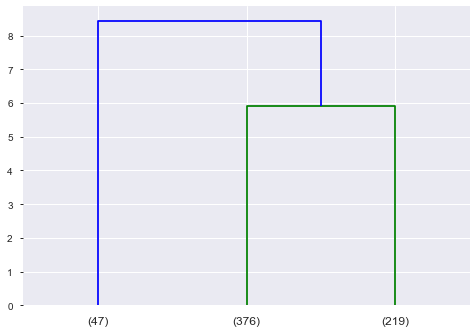

In [93]:
dendrogram(Z, truncate_mode='lastp',p=3)
plt.show()

In [94]:
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
complete_sc = silhouette_score(X_std,clusters)

In [95]:
tempResultsDf = pd.DataFrame({'linkage':['complete'], 
                              'cophenetic coeff': complete_c,
                              'silhouette_score': complete_sc},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['linkage','cophenetic coeff', 'silhouette_score']]
results

,linkage,cophenetic coeff,silhouette_score
0,ward,0.742861,0.519784
1,average,0.902956,0.519784
2,complete,0.886412,0.520901


### linkage method ='single'

In [96]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='single')
model.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

In [97]:
Z = linkage(X_std, metric='euclidean', method='single')
single_c, coph_dists = cophenet(Z , pdist(X_std))

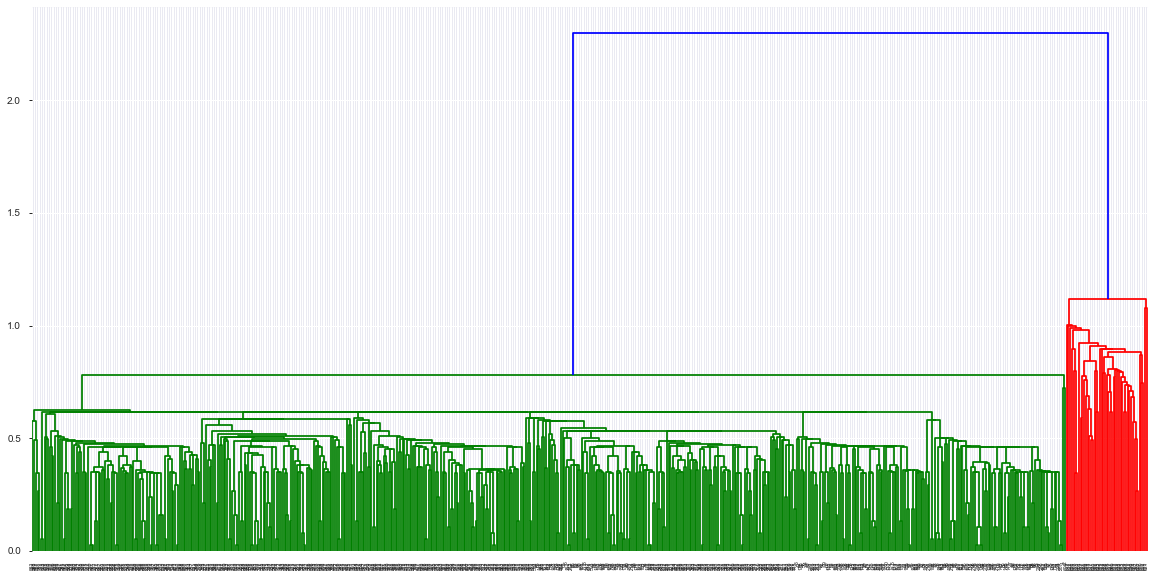

In [98]:
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

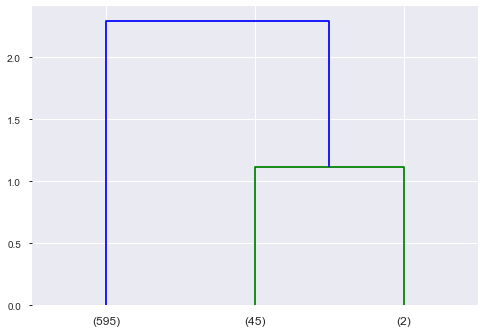

In [99]:
dendrogram(Z, truncate_mode='lastp',p=3)
plt.show()

In [100]:
max_d = 1
clusters = fcluster(Z, max_d, criterion='distance')
single_sc = silhouette_score(X_std,clusters)

In [101]:
tempResultsDf = pd.DataFrame({'linkage':['single'], 
                              'cophenetic coeff': single_c,
                              'silhouette_score': single_sc},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['linkage','cophenetic coeff', 'silhouette_score']]
results

,linkage,cophenetic coeff,silhouette_score
0,ward,0.742861,0.519784
1,average,0.902956,0.519784
2,complete,0.886412,0.520901
3,single,0.744817,0.512156


Comments:
* linkage method average give higher cophenetic coeff - 0.902956 and with silhouette score 0.519784

### Select linkage ='average' as the final model for Hierarchical clustering

In [102]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [103]:
Z = linkage(X_std, metric='euclidean', method='average')
average_c, coph_dists = cophenet(Z , pdist(X_std))

In [104]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
average_sc = silhouette_score(X_std,clusters)

In [105]:
# creating a new dataframe only for labels and converting it into categorical variable

data_labels = pd.DataFrame(model.labels_ , columns = list(['labels']))

data_labels['labels'] = model.labels_

In [106]:
data_labels['labels'] = data_labels['labels'].astype('category')

In [107]:
data_labels = data.join(data_labels)

In [108]:
data_labels

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,20000,3,0,1,8,1
1,15000,3,0,1,1,1
2,5000,2,0,2,2,1
3,3000,4,0,1,7,1
4,10000,4,0,5,5,1
...,...,...,...,...,...,...
637,99000,10,1,10,0,0
638,84000,10,1,13,2,0
639,145000,8,1,9,1,0
640,172000,10,1,15,0,0


In [109]:
X_std['labels'] = model.labels_

In [110]:
# Hierarchical clustering method 

X_std_Clust = X_std.groupby(['labels'])
X_std_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,2.905755,1.927283,-1.110958,2.889150,-0.893968
1,-0.594988,-1.050333,-0.902560,0.323784,1.138345
2,-0.013578,0.378453,0.672943,-0.554402,-0.560315


Comments:

Compare with K-means centroid, the values are almost the same
 
* Cluster 2 has the highest value for Avg_Credit_Limit,Total_Credit_Cards & Total_visits_online.
* Cluster 2 has the lowest value for Total_visits_bank.
* Cluster 1 has the highest value for Total_calls_made.
* Cluster 1 has the lowest value for Avg_Credit_Limit & Total_Credit_Cards.
* Cluster 0 has the highest value for Total_visits_bank.
* Cluster 0 has the lowest value for Total_visits_online.

Note: Hierarchical clustering has different label than K-means. Label 0 is group 2 in k-means clustering.
Label 2 is group 0 in k-means clustering. Lable 1 and group 1 are the same.

In [111]:
# k-means clustering method

centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.015485,0.377806,0.670462,-0.553460,-0.558444
1,-0.594379,-1.055726,-0.905492,0.326169,1.142877
2,2.905755,1.927283,-1.110958,2.889150,-0.893968


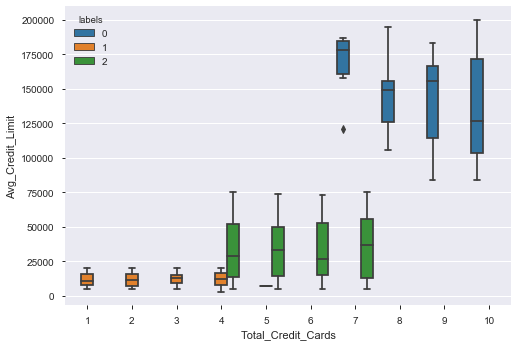

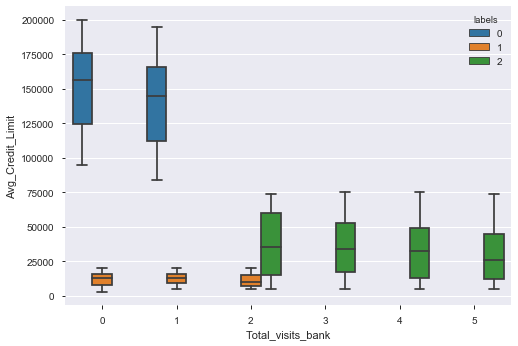

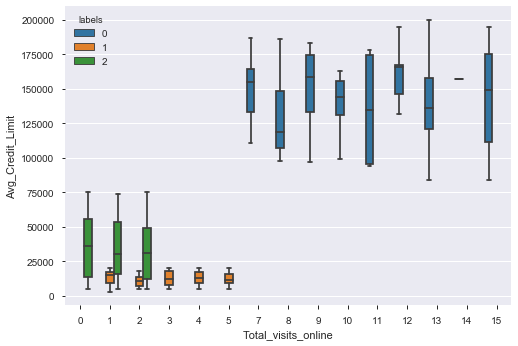

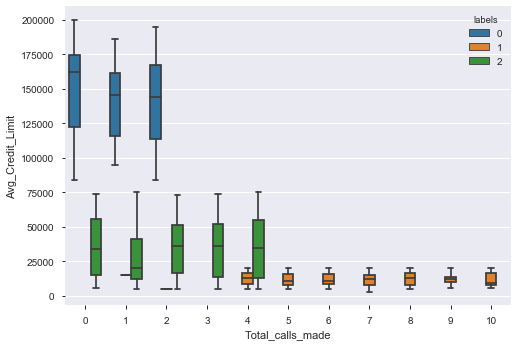

In [112]:
# Hierarchical clusters boxplot

for i in data_labels.columns[(data_labels.columns!='labels') & (data_labels.columns!='Avg_Credit_Limit')]:
    sns.boxplot(x=data_labels[i],y=data_labels['Avg_Credit_Limit'], hue=data_labels['labels'])
    plt.show()


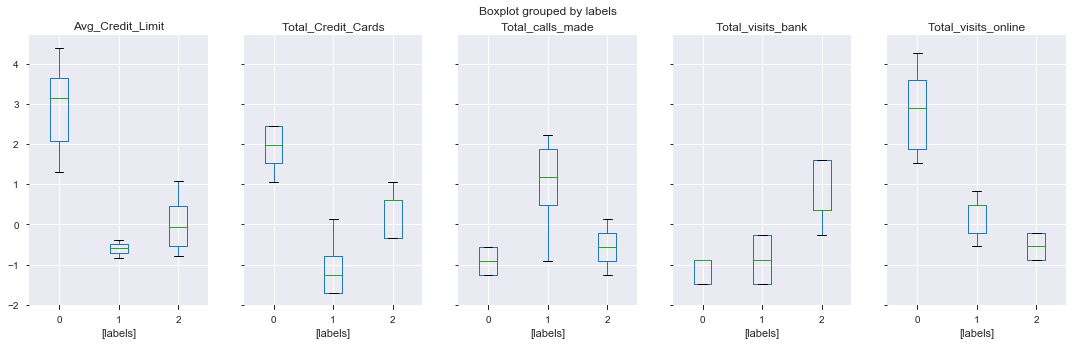

In [113]:
# Hierarchical clusters boxplot

X_std.boxplot(by='labels',layout=(1,5),figsize=(18,5));

Comment on Hierarchical clusters:
    
* Label 0 has an obvious distinction compare to Label 1 and 2.
    * Customers who have average credit limit of 75k and above are in Label 0.
    * Customers who have more than 7 credit cards are in Label 0.
    * Customers who have visited online more than 6 times are in Label 0.
* Label 1 has less credit cards compare to other labels - 1-4 credit cards.
* Label 1 has one attribute that is distinct from other Labels namely, customers who make calls more than 4 times.
* Label 2 visited bank more than other labels - more than 2 times and up to 5 times.
* Label 2 also less visited bank online compare to other labels.

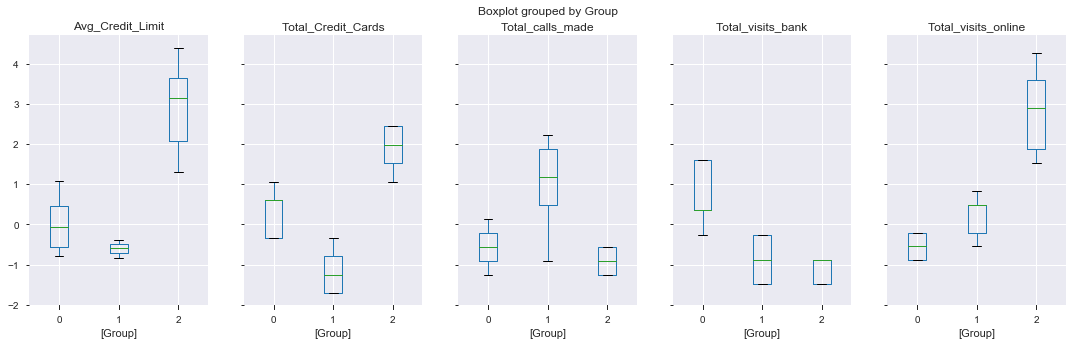

In [114]:
# K-means clusters boxplot

data_z.boxplot(by='Group',layout=(1,5),figsize=(18,5));

In [115]:
# Hierarchical clusters  
data_labels['labels'].value_counts()  

2    374
1    221
0     47
Name: labels, dtype: int64

In [116]:
# K-means clusters
data_group['Group'].value_counts()  

0    375
1    220
2     47
Name: Group, dtype: int64

In [117]:
# K-means clusters
data_group['Group'].value_counts(normalize=True)  

0    0.584112
1    0.342679
2    0.073209
Name: Group, dtype: float64

In [118]:
# Hierarchical clusters silhouette score (linkage method:'average')
average_sc

0.5197840914842371

In [119]:
# K-means clusters silhouette score
km_silhouette_score

0.5207269512698913

Comments:
*  Hierarchical cluster has almost the same cluster as K-means clusters.
*  The labeling of cluster is different between K-means clusters & Hierarchical cluster.
*  Hierarchical clusters - Cluster 2 is labeled as cluster 0 in  K-means clustering.
*  Hierarchical clusters - Cluster 0 is labeled as cluster 2 in  K-means clustering.
*  Hierarchical clusters - Cluster 1 is the same as cluster 1 in  K-means clustering.
*  Hierarchical clusters - Cluster 1 has one customer more than cluster 1 in K-means clustering. ( 221 vs 220 )
*  Hierarchical clusters - Cluster 2 has one customer less than cluster 0 in K-means clustering. ( 374 vs 375 )
*  Hierarchical clusters silhouette score is almost same as K-means clusters ( 0.51978 vs. 0.52072)
*  Silhouette score closer to 1 indicate the clustering is better. In this case, we can say that K-means clusters is slightly better than k-means cluster.

### Key Questions:
* How many different segments of customers are there?
         
      * There are 3 different segements of customers in AllLife Bank credit card customer base.   
     
     
* How are these segments different from each other?

    Using k-means clustering labels as reference: (Group 0-2) 
          
       
         Group 1
       * Customers who have average credit limit below 25k and own credit cards 1-4 max.
       * Customers who seldom visit bank 0-2 times.
       * Customers who visit bank online moderately (1-5 times)
       * Customers who make most phone calls (4-10 times)
       * 34% of customers are in this group.  
       
         Group 2
       * Customers who have average credit limit above 75k and own most credit cards 7-10 max.
       * Customers who least visited bank 0-1 times.
       * Customers who most visit bank online . (7-15 times)
       * Customers who make least phone calls (0-2 times)
       * Only 7.3% of customers are in this group. 
       
         Group 0
       * Customers who have average credit limit between 25k and 75k and own credit cards 4-7 max.
       * Customers who most visited bank  2-5 times.
       * Customers who least visit bank online. (0-2 times)
       * Customers who make moderate phone calls (0-4 times)
       * Majority of customers are in this group - 58.4%.
     
     
*  What are your recommendations to the bank on how to better market to and service these customers?

       * Group 1 own less credit card than others, bank should target group 1 to upsell credit cards services.
       * Besides, bank should provide higher credit limit to target group 0 where most of the customers are. 
         With higher credit limit,group 0 would be able to spend more.
       * Since group 0 use the online banking the least,bank should promote more to group 0 in order for them 
         to use it.
       * Assuming group 1 who make most phone calls are the customers perceive the support services of the bank 
         poorly. Bank should target group 1 and provide better customers service by conducting feedback survey 
         through phone.